<>:10: SyntaxWarning: invalid escape sequence '\g'
<>:10: SyntaxWarning: invalid escape sequence '\g'
C:\Users\Pratham Kumar\AppData\Local\Temp\ipykernel_29304\454019032.py:10: SyntaxWarning: invalid escape sequence '\g'
  df = pd.read_csv("D:\gitfolder\Data-DaVinci\Week 4\Assignment\FILES\parkingLot.csv")


ADF Test p-value: 1.7528210864246264e-09
Data is stationary.
ARIMA MAE: 213.89738034563695, MAPE: 6.444245201187992
ETS MAE: 202.32008728085455, MAPE: 6.111797853634787


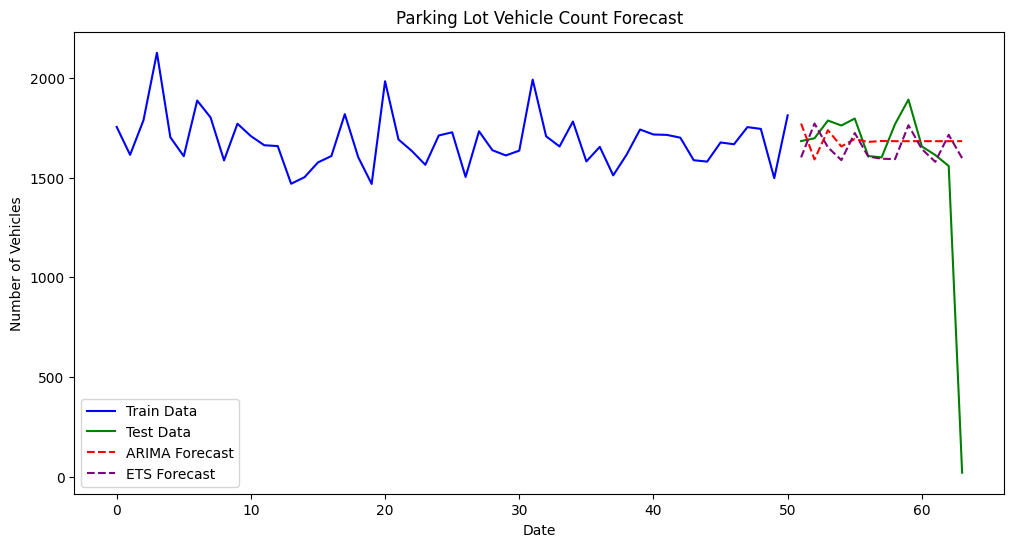

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
df = pd.read_csv("D:\gitfolder\Data-DaVinci\Week 4\Assignment\FILES\parkingLot.csv")

# Data Cleaning
# Remove rows with missing or invalid vehicle numbers
df = df[df["vehicle_no"].apply(lambda x: isinstance(x, str))]

# Convert timestamps to datetime format
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Extract date part for daily aggregation
df["date"] = df["timestamp"].dt.date

# Count vehicles entering per day
daily_counts = df.groupby("date").size().reset_index(name="numcars")

# Split into train (first 80%) and test (last 20%)
split_idx = int(len(daily_counts) * 0.8)
df_train, df_test = daily_counts.iloc[:split_idx], daily_counts.iloc[split_idx:]

# Check for stationarity
p_value = adfuller(df_train["numcars"])[1]
print("ADF Test p-value:", p_value)
if p_value > 0.05:
    print("Data is non-stationary. Consider differencing or transformation.")
else:
    print("Data is stationary.")

# ARIMA Forecasting using statsmodels
arima_model = ARIMA(df_train["numcars"], order=(2, 1, 2))  # Adjust order as needed
arima_result = arima_model.fit()
forecast_arima = arima_result.forecast(steps=len(df_test))

# ETS Forecasting
ets_model = ETSModel(df_train["numcars"], error="add", trend="add", seasonal="add", seasonal_periods=7)
ets_model = ets_model.fit()
forecast_ets = ets_model.forecast(steps=len(df_test))

# Evaluation Metrics
mae_arima = mean_absolute_error(df_test["numcars"], forecast_arima)
mape_arima = mean_absolute_percentage_error(df_test["numcars"], forecast_arima)
mae_ets = mean_absolute_error(df_test["numcars"], forecast_ets)
mape_ets = mean_absolute_percentage_error(df_test["numcars"], forecast_ets)

print(f"ARIMA MAE: {mae_arima}, MAPE: {mape_arima}")
print(f"ETS MAE: {mae_ets}, MAPE: {mape_ets}")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df_train.index, df_train["numcars"], label="Train Data", color="blue")
plt.plot(df_test.index, df_test["numcars"], label="Test Data", color="green")
plt.plot(df_test.index, forecast_arima, label="ARIMA Forecast", color="red", linestyle="dashed")
plt.plot(df_test.index, forecast_ets, label="ETS Forecast", color="purple", linestyle="dashed")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Number of Vehicles")
plt.title("Parking Lot Vehicle Count Forecast")
plt.show()
